# Implementación del PCA: Ejemplo

In [9]:
# Cargar las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn

## El conjunto de datos de iris (Fisher).



In [10]:
#Cargamos la base de datos importando el drive personal
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#Cargamos la base de datos con el enlace del documento
iris2 = pd.read_excel('/content/drive/MyDrive/Data set/IRIS.xlsx')
iris2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
import pandas as pd

# URL del dataset Iris en la UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Leer el dataset en un DataFrame de pandas
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris3 = pd.read_csv(url, header=None, names=column_names)

# Mostrar las primeras filas del DataFrame
iris3.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
from sklearn.datasets import load_iris
import pandas as pd

# Cargar el dataset Iris
iris4 = load_iris()

# Convertir a DataFrame de pandas
iris4_df = pd.DataFrame(data=iris4.data, columns=iris4.feature_names)

# Agregar la columna de la especie
iris4_df['species'] = iris4.target

# Mostrar las primeras filas del DataFrame
iris4_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Preprocesamiento


In [14]:
# Separar las características y la etiqueta
X = iris4_df.drop('species', axis=1) # Selecciona todas las columnas excepto 'species'
y = iris4_df['species'] # Selecciona la columna 'species' como la etiqueta

In [15]:
# Normalizar los datos
X_media = X - np.mean(X, axis=0) # Centra los datos restando la media de cada característica
X_std = X_media / np.std(X, axis=0) # Estandariza los datos dividiendo por la desviación estándar de cada característica

In [16]:
# Calcular la matriz de covarianza
cov_matrix = np.cov(X_std, rowvar=False) # Calcula la matriz de covarianza de los datos estandarizados
cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [17]:
# Calcular valores y vectores propios
eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix) # Calcula los valores propios y vectores propios de la matriz de covarianza

# Ordenar valores y vectores propios
eigen_values_index = np.argsort(eigen_values)[::-1] # Obtiene los índices que ordenarían los valores propios en orden descendente
eigen_values_chamber = eigen_values[eigen_values_index] # Reordenar los valores propios

eigen_vectors_chamber = eigen_vectors[:, eigen_values_index] # Reordenar los vectores propios

eigen_values_chamber

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [18]:
eigen_vectors_chamber

array([[-0.52106591,  0.37741762,  0.71956635,  0.26128628],
       [ 0.26934744,  0.92329566, -0.24438178, -0.12350962],
       [-0.5804131 ,  0.02449161, -0.14212637, -0.80144925],
       [-0.56485654,  0.06694199, -0.63427274,  0.52359713]])

In [19]:
# Seleccionar los dos primeros componentes principales
eigen_subset = eigen_vectors_chamber[:, 0 :2] # Selecciona los dos primeros vectores propios (componentes principales)
eigen_subset

array([[-0.52106591,  0.37741762],
       [ 0.26934744,  0.92329566],
       [-0.5804131 ,  0.02449161],
       [-0.56485654,  0.06694199]])

In [20]:
# Reducir la dimension de los datos
# X_red Proyecta los datos estandarizados sobre los dos primeros componentes principales
X_red = np.dot(eigen_subset.transpose(), X_std.transpose()).transpose()
X_red

array([[ 2.26470281,  0.4800266 ],
       [ 2.08096115, -0.67413356],
       [ 2.36422905, -0.34190802],
       [ 2.29938422, -0.59739451],
       [ 2.38984217,  0.64683538],
       [ 2.07563095,  1.48917752],
       [ 2.44402884,  0.0476442 ],
       [ 2.23284716,  0.22314807],
       [ 2.33464048, -1.11532768],
       [ 2.18432817, -0.46901356],
       [ 2.1663101 ,  1.04369065],
       [ 2.32613087,  0.13307834],
       [ 2.2184509 , -0.72867617],
       [ 2.6331007 , -0.96150673],
       [ 2.1987406 ,  1.86005711],
       [ 2.26221453,  2.68628449],
       [ 2.2075877 ,  1.48360936],
       [ 2.19034951,  0.48883832],
       [ 1.898572  ,  1.40501879],
       [ 2.34336905,  1.12784938],
       [ 1.914323  ,  0.40885571],
       [ 2.20701284,  0.92412143],
       [ 2.7743447 ,  0.45834367],
       [ 1.81866953,  0.08555853],
       [ 2.22716331,  0.13725446],
       [ 1.95184633, -0.62561859],
       [ 2.05115137,  0.24216355],
       [ 2.16857717,  0.52714953],
       [ 2.13956345,

In [21]:
# Crear un DataFrame con los componentes principales
principal_df = pd.DataFrame(X_red, columns=['PC1', 'PC2']) # Crea un DataFrame con las dos primeras componentes principales
principal_df

,PC1,PC2
0,2.264703,0.480027
1,2.080961,-0.674134
2,2.364229,-0.341908
3,2.299384,-0.597395
4,2.389842,0.646835
...,...,...
145,-1.870503,0.386966
146,-1.564580,-0.896687
147,-1.521170,0.269069
148,-1.372788,1.011254


In [22]:
# Concatenar con las etiquetas originales
principal_df = pd.concat([principal_df, iris4_df[['species']]], axis=1) # Agrega la columna 'species' al DataFrame de componentes principales
principal_df

,PC1,PC2,species
0,2.264703,0.480027,0
1,2.080961,-0.674134,0
2,2.364229,-0.341908,0
3,2.299384,-0.597395,0
4,2.389842,0.646835,0
...,...,...,...
145,-1.870503,0.386966,2
146,-1.564580,-0.896687,2
147,-1.521170,0.269069,2
148,-1.372788,1.011254,2


In [23]:
# Visualizar los datos usando Plotly
import plotly.express as px

fig = px.scatter(principal_df, x='PC1', y='PC2', color='species') # Crea un gráfico de dispersión con PC1 y PC2, coloreado por 'species'
fig.show() #Muestra el gráfico interactivo

##Ejercicio de Tarea

Componentes principales:
         PC1       PC2
0 -1.579414  0.088702
1 -1.058128 -0.432584
2 -0.312772  0.312772
3  1.623764 -0.878408
4  1.326548  0.909520

Varianza explicada por cada componente:
 [0.81083494 0.18916506]


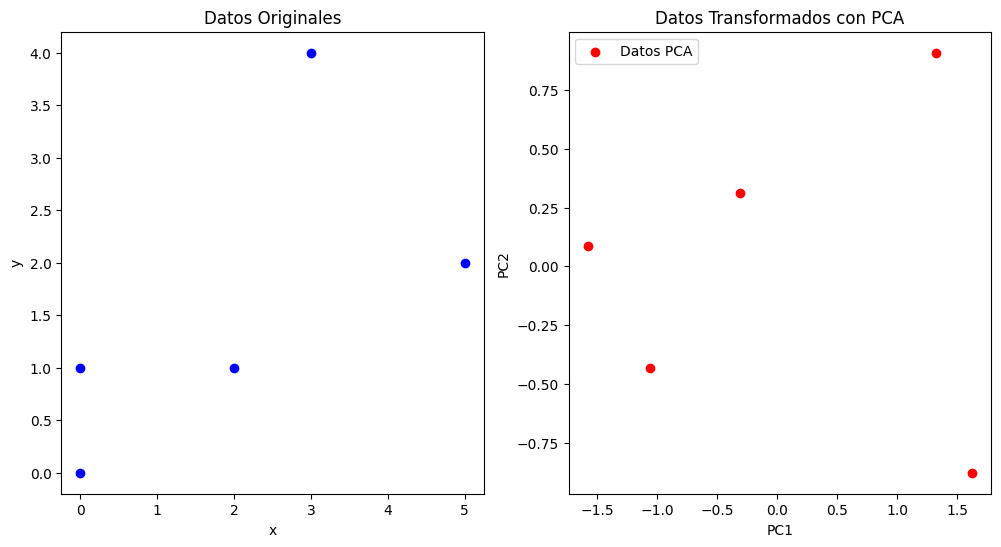

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Datos
x = np.array([0, 0, 2, 3, 5])
y = np.array([0, 1, 1, 4, 2])

# Crear un DataFrame con los datos
data = pd.DataFrame({'x': x, 'y': y})

# Normalizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Crear un objeto PCA y ajustar los datos
pca = PCA(n_components=2)  # En este caso, solo queremos dos componentes principales
pca_result = pca.fit_transform(data_scaled)

# Crear un DataFrame con los componentes principales
principal_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Mostrar los resultados
print("Componentes principales:\n", principal_df)
print("\nVarianza explicada por cada componente:\n", pca.explained_variance_ratio_)

# Graficar los datos originales y los datos transformados
plt.figure(figsize=(12, 6))

# Graficar los datos originales
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', label='Datos Originales')
plt.title('Datos Originales')
plt.xlabel('x')
plt.ylabel('y')

# Graficar los datos transformados (proyectados en los componentes principales)
plt.subplot(1, 2, 2)
plt.scatter(principal_df['PC1'], principal_df['PC2'], color='red', label='Datos PCA')
plt.title('Datos Transformados con PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.legend()
plt.show()
